# Deep Learning for the Geosciences (Technion 16837)

## Assignment #3b: Circles

In [18]:
import numpy as np # Importing the numpy package to perform calculations
import matplotlib.pyplot as plt # Importing the pyplot package to plot data
import sys

%matplotlib inline

# Import local files
sys.path.append('code')
from utils import *
from perceptron import *
from nn import *

# Do not change below! Important for reloading code you write in external .py files.
%load_ext autoreload 
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## <ins>Note about chatGPT </ins>
As always, you may use chatGPT to complete your assignments, if you indicate you did. However, since our goal here is not only to get a good grade - but also to learn something - I recommend that you first attempt to solve the assignment yourself and only then look at what ChatGPT has to offer. 

When choosing to use ChatGPT:
1. Please write your input prompt.
2. Try to understand the code instead of just copying it.
3. Explain the code in words. What does each line do? What is the expected input and output?

Important note: Failing to disclose the use of ChatGPT or similar AI tools in an assignment may lead to the loss of all points for the assignment.

---

# 1. <ins>Generate the circles data</ins>

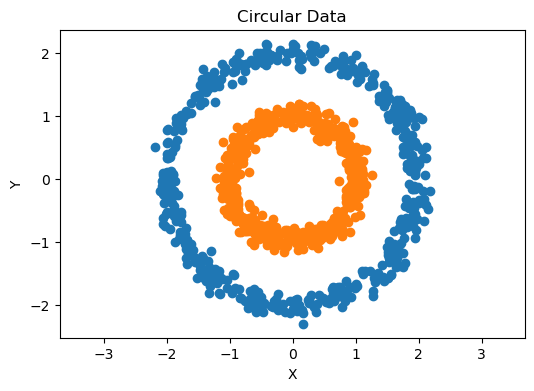

In [37]:
# Seed for reproducibility
np.random.seed(42)

# Number of samples and features (2 classes)
n_samples = 1000
n_features = 2

# Parameters for the circles
radius1, center1 = 2, (0, 0)
radius2, center2 = 1, (0, 0)

# Generate data
x1, y1 = generate_circle_data(radius1, center1, n_samples // 2)
x2, y2 = generate_circle_data(radius2, center2, n_samples // 2)

# Generate labels
l1 = -np.ones(np.shape(x1)) # -1 for negative labels
l2 = np.ones(np.shape(x2)) # 1 for positive labels

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.title("Circular Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.show()

## Stack the data (create the input matrix)

In [38]:
X = np.vstack(((np.vstack((x1, y1)).T), (np.vstack((x2, y2)).T)))
y_true = np.hstack([l1, l2])

## Initialize the parameters of the perceptron

In [96]:
# Initialize weights W with small random values
W = np.random.rand(n_features) * 0.01# * 1000

# Initialize bias b with a small random value
b = np.random.rand() * 1e-4 #*1000

print("Your intial weights and bias are " + str(W) + " and " + str(b))

Your intial weights and bias are [3.83838883 4.56236509] and 3.690530217609166e-05


# 2. Perceptron model
The perceptron is an early linear machine learning model. In class, we have seen a perceptron that maps classes into 0s and 1s using the Threshold function. Here, our classes are +1 and -1, and our approach would be a little different.

A perceptron unit that classifised values into +1 or -1 can be written as:
$$ y=\rm{sgn}(W \vec x+\vec b) $$

where $y=W \vec x+\vec b $ is a linear classifier, and $\rm{sgn}(z)=\frac{z}{|z|}$ is a function that returns the sign of any number. For example, $\rm{sgn}(7)=1$ and $\rm{sgn}(-6)=-1$. In other words, positive values will be classified as 1, and negative values as -1.

Using that defintion, we can use the hinge loss we saw in class and in the last homework:
$$ \mathcal{L} = \max(0, ty) $$

In this task, we will classify our circular data using a perceptron. 

## Train your perceptron on the input data

In [97]:
W_final, b_final = train_perceptron(W, b, X, y_true, perceptron_grad, learning_rate=0.01, iterations=5000)
print("Your final weights and bias are " + str(W_final) + " and " + str(b_final))

Optimization Complete.
Your final weights and bias are [0.48090628 0.15264669] and -0.019233094697823673


## Compute the accuracy

Your model's accuracy is 0.483


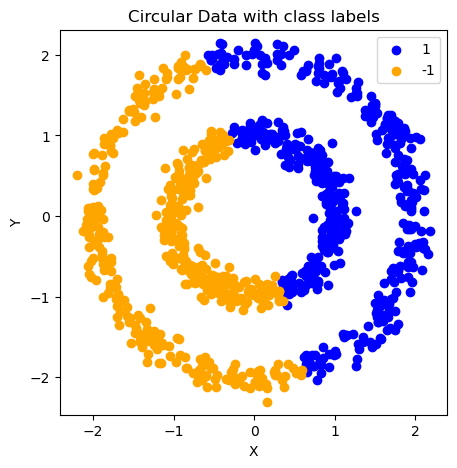

In [98]:
y_pred = perceptron(X, W_final, b_final)
compute_accuracy(y_true, y_pred)

# Create a figure of the original data with the predicted class labels
plt.figure(figsize=(5, 5))
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1], 
            c = 'blue')
plt.scatter(X[y_pred == -1,0], X[y_pred == -1,1], 
            c = 'orange')
plt.clim([-2, 2])
plt.legend(['1','-1'])
plt.title("Circular Data with class labels")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.show()

***
## <font color='lightgreen'>Answer the following questions</font>
1. What is the accuracy of the perceptron? Is that what you expected? If yes, why? If no, what did you expect?
2. What happens if you initialize the weights and biases with different values? Try increasing the initial bias by a factor of 1000. What happens to the accuracy? Why?
***

הדיוק שקיבלתי עבור המודל אינו כ-50 אחוז. דיוק זה תואם את מה שציפיתי לקבל מפני שהמודל היו לינארי ואין אפשרות לבצע הפרדה לינארית בין שתי הקבוצות של הנתונים. 
כאשר הגדלתי את הערך ההתחלתי של הבייס, נראה שלא היה שינוי בתוצאה, בגלל שמדובר בסיווג לינארי לא נוכל לעבור את הרף של 50 אחוז דיוק.

# 3. A Neural Network
Now, let's train a neural network to classify our circular data. The neural network will have three hidden layers with a ReLU activation function, and an output layer with a Sigmoid activation. You will compared two loss functions: MSE, which we have seen in class, and binary cross entropy, which we have not seen in class and is explicitly written below.

A diagram of the network:

[Input layer] --> [hidden layer 1] --> [hidden layer 2] --> [hidden layer 3] --> [output layer]

1. The two loss functions: MSE (mean square error):
   $$ \mathcal{L}=\sum_i||\hat y^{(i)} - y^{(i)}||_2$$
   and binary cross entropy (BCE):
   $$ \mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \left( y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right) $$
2. Explain in words what do the two terms in the parentheses of the BCE loss mean. Rememeber, $y$ and $\hat y$ can be either 0 or 1. What happens when $y=1$? What happens when $y=0$?
3. Write a computational graph for the neural network
4. Use backprop to compute the gradients $\partial \mathcal{L} / \partial W$ and $\partial \mathcal{L} / \partial b$.
5. Train your model by implementing the functions inside nn.py.
6. Note that training might take a while! Especially when increasing the number of neurons. On a very new laptop, training with $100^2$ parameters takes about 30 seconds. Before you increase the size of the network, make sure it converges with less neurons (make sure the loss decreases - even a little - for n = 5, for example).

## Initialize the parameters of the neural network

In [22]:
n_features = X.shape[1]  # Number of input features
n_hidden1 = 5  # Number of neurons in the first hidden layer
n_hidden2 = 5  # Number of neurons in the second hidden layer
n_hidden3 = 5  # Number of neurons in the third hidden layer
n_output = 1   # Number of output neurons, for binary classifier

# Hidden layers
W1 = np.random.randn(n_features, n_hidden1) * 0.1
b1 = np.ones(n_hidden1) * 1e-4

W2 = np.random.randn(n_hidden1, n_hidden2) * 0.1
b2 = np.ones(n_hidden2) * 1e-4

W3 = np.random.randn(n_hidden2, n_hidden3) * 0.1
b3 = np.ones(n_hidden3) * 1e-4

# Output layer
W_output = np.random.randn(n_hidden3, n_output) * 0.1
b_output = np.ones(n_output) * 1e-4

# Reset the labels to 0, 1:
y_true = y_true.reshape(-1, 1)
y_true[y_true < 0] = 0

## Train your neural network. Complete all functions in nn.py

In [9]:
# Train the network. You can (optionally) return the trian/test loss. See function description.
W1, b1, W2, b2, W3, b3, W4, b4, _, _ = train_network(X, y_true, W1, b1, W2, b2, W3, b3, W_output, b_output,
                                               learning_rate=0.01, iterations=50)


Iteration 0: Train Loss = 0.2500
the number of iteration is 49


Your model's accuracy is 0.55


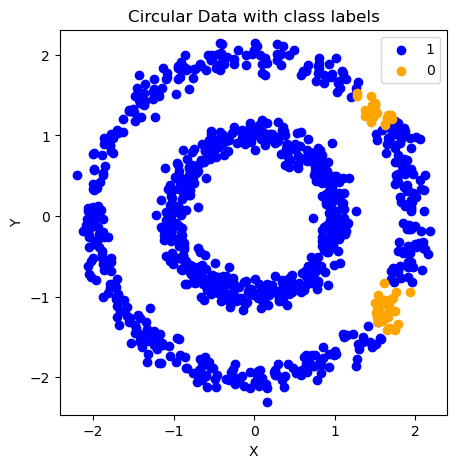

In [11]:
def predict(X, W1, b1, W2, b2, W3, b3, W4, b4):
    """
    Generates predictions for the given input X using the trained neural network parameters.
    """
    # Perform a forward pass to get the output probabilities
    _, _, _, output = forward_pass(X, W1, b1, W2, b2, W3, b3, W4, b4)
    
    # Threshold the probabilities at 0.5 to make binary predictions
    predictions = output > 0.5
    return predictions.astype(int).flatten()

# Make predictions
y_pred = predict(X, W1, b1, W2, b2, W3, b3, W4, b4)
compute_accuracy(y_true, y_pred)

# Create a figure of the original data with the predicted class labels
plt.figure(figsize=(5, 5))
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1], 
            c = 'blue')
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1], 
            c = 'orange')
plt.clim([-2, 2])
plt.legend(['1','0'])
plt.title("Circular Data with class labels")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.show()

***
## <font color='lightgreen'>Answer the following questions</font>
Use the mean square error loss function to answer the following questions:
1. What is the accuracy of the neural network with 5 neurons at each layer?
2. Try to increase the number of neurons, while keeping the training rate and number of iterations constant. Plot the number of neurons as a function of the network accuracy. What do you see? Why?

Use the softmax (binary crossentropy) loss to answer the following questions:
1. For the same model size, do you get higher accuracy when using this loss function?
2. How many neurons do you need for the neural network to achieve accuracy of 100%?
3. Try to find the optimal parameters for the network: think about efficiency (training time) and memory, and also about accuracy.
4. For the binary cross entropy loss neural network, compute the forward pass for x, y = np.linspace(0,3,100). Plot the output layer (make sure to use np.flatten()) as a function of r and theta, computed from x, y. What do you see? What is the network learning, in your opinion?
***

הדיוק עבור 5 ניורונים יצא לי 50 אחוז. נראה כי הרשת אינה מצליחה ללמוד בכמות נוירונים קטנה.
עבור הגדלה של כמות הנוירונים נראה שהדיוק של הסיווג גדל, כך שעבור כ40 נויורונים אנחנו מקבלים דיוק של 100 אחוז.
התוצאה הגיונית בגלל שהדטא שלנו מופרד באופן מובהק ומפני שאנחנו בודקים את עצמנו על דטא האימון שלנו. בשלב זה  לא ביצענו הפרדה בין נתוני האימומן ונתוני הבדיקה.

In [26]:
from tqdm import tqdm
Acuuracys = []
for n in tqdm(range(10,70,5)):
    n_features = X.shape[1]  # Number of input features
    n_hidden1 = n  # Number of neurons in the first hidden layer
    n_hidden2 = n  # Number of neurons in the second hidden layer
    n_hidden3 = n  # Number of neurons in the third hidden layer
    n_output = 1   # Number of output neurons, for binary classifier
    
    # Hidden layers
    W1 = np.random.randn(n_features, n_hidden1) * 0.1
    b1 = np.ones(n_hidden1) * 1e-4
    
    W2 = np.random.randn(n_hidden1, n_hidden2) * 0.1
    b2 = np.ones(n_hidden2) * 1e-4
    
    W3 = np.random.randn(n_hidden2, n_hidden3) * 0.1
    b3 = np.ones(n_hidden3) * 1e-4
    
    # Output layer
    W_output = np.random.randn(n_hidden3, n_output) * 0.1
    b_output = np.ones(n_output) * 1e-4
    
    # Reset the labels to 0, 1:
    y_true = y_true.reshape(-1, 1)
    y_true[y_true < 0] = 0
    
    
    # Train the network. You can (optionally) return the trian/test loss. See function description.
    W1, b1, W2, b2, W3, b3, W4, b4, _, _ = train_network(X, y_true, W1, b1, W2, b2, W3, b3, W_output, b_output,
                                                   learning_rate=0.01, iterations=5000)
    
    y_pred = predict(X, W1, b1, W2, b2, W3, b3, W4, b4)
    Acuuracys.append(compute_accuracy(y_true, y_pred))

100%|██████████| 12/12 [03:26<00:00, 17.23s/it]


Text(0, 0.5, 'Accuracy')

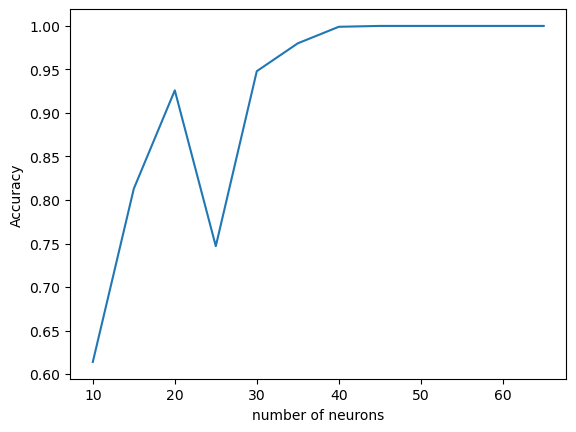

In [28]:
plt.plot(list(range(10,70,5)),Acuuracys)
plt.xlabel("number of neurons")
plt.ylabel("Accuracy")

In [29]:
from tqdm import tqdm
Acuuracys_bce = []
for n in tqdm(range(10,70,5)):
    n_features = X.shape[1]  # Number of input features
    n_hidden1 = n  # Number of neurons in the first hidden layer
    n_hidden2 = n  # Number of neurons in the second hidden layer
    n_hidden3 = n  # Number of neurons in the third hidden layer
    n_output = 1   # Number of output neurons, for binary classifier
    
    # Hidden layers
    W1 = np.random.randn(n_features, n_hidden1) * 0.1
    b1 = np.ones(n_hidden1) * 1e-4
    
    W2 = np.random.randn(n_hidden1, n_hidden2) * 0.1
    b2 = np.ones(n_hidden2) * 1e-4
    
    W3 = np.random.randn(n_hidden2, n_hidden3) * 0.1
    b3 = np.ones(n_hidden3) * 1e-4
    
    # Output layer
    W_output = np.random.randn(n_hidden3, n_output) * 0.1
    b_output = np.ones(n_output) * 1e-4
    
    # Reset the labels to 0, 1:
    y_true = y_true.reshape(-1, 1)
    y_true[y_true < 0] = 0
    
    
    # Train the network. You can (optionally) return the trian/test loss. See function description.
    W1, b1, W2, b2, W3, b3, W4, b4, _, _ = train_network(X, y_true, W1, b1, W2, b2, W3, b3, W_output, b_output,
                                                   learning_rate=0.01, iterations=5000, loss_type = 'bce')
    
    y_pred = predict(X, W1, b1, W2, b2, W3, b3, W4, b4)
    Acuuracys_bce.append(compute_accuracy(y_true, y_pred))

100%|██████████| 12/12 [03:25<00:00, 17.09s/it]


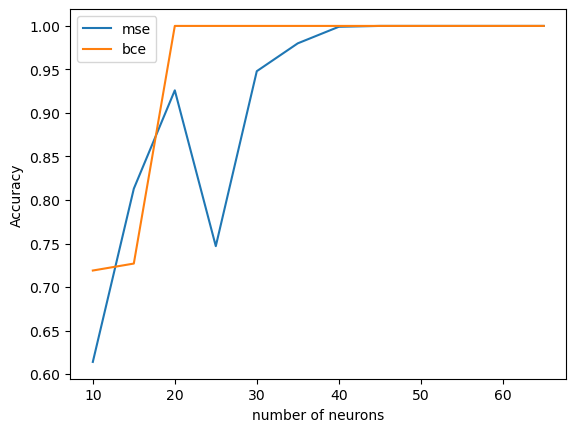

In [30]:
plt.plot(list(range(10,70,5)),Acuuracys, label = "mse")
plt.plot(list(range(10,70,5)),Acuuracys_bce, label = "bce")
plt.xlabel("number of neurons")
plt.ylabel("Accuracy")
plt.legend()

ניתן לראות בגרף שכעמט עבור כל מספר של נוירונים קיבלתי דיוק גבוהה יותר עבור פונקציית הלוס של הבינאיר קרוסאנטרופי.
עבור 100 אחוז הצלחה צריך 20 נויורונים.
אני מאמין כי עבודה עם 20 נוירונים ופונקציית לוס של בינארי קורסאנטרופי יהיה חסכוני הן בזמן והם במקום ועדיין יוביל אותנו לדיוק מרבי.


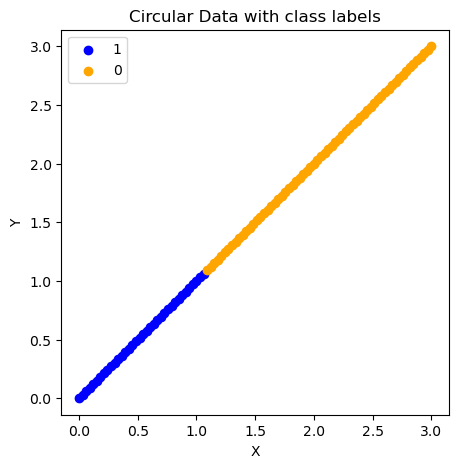

In [35]:
x = np.linspace(0,3,100)
y = np.linspace(0,3,100)

X = (np.vstack((x, y)).T)

y_pred = predict(X, W1, b1, W2, b2, W3, b3, W4, b4)

plt.figure(figsize=(5, 5))
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1], 
            c = 'blue')
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1], 
            c = 'orange')
plt.clim([-2, 2])
plt.legend(['1','0'])
plt.title("Circular Data with class labels")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.show()

באופן דומה למה שציפיתי ההפרדה שקיבלנו עבור הקו הלינארי היא לפי איזשהו ערך סף של רדיוס הנקודה (ללא קשר לזווית), שכן לימדנו את המודל להבדיל בין שני מעגלים עם רדיוסים שונים.
בשונה ממה שחשבתי מרכז המעגל נשאר ב0,0 וזה בגלל שהמרכז של שני העיגולים עליהם אימנו את המודל. אני ציפיתי שמרכז הקו יהיה כחול ושני קצוות הקו יהיו כתומים.
ניתן להבין שבגלל החוסר בגיוון הנתונים של האימון הלמידה התייחסה רק לרדיוס ולא לזווית או למרכז המעגל.